# Embedding

## 1-下載資料

In [1]:
from urllib.request import urlretrieve
import os
url = "http://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz"
# 如果 data 資料夾不存在就創一下
if not os.path.exists("../data"):
    print("data 資料夾不存在, 現在幫你創唷")
    os.mkdir("data")
    
# 還沒下載過就下載一下
filepath = "data/imdb.tar.gz"
if not os.path.exists(filepath):
    print("還沒下載過資料, 現在幫你下載唷")
    urlretrieve(url, filepath)
else:
    print("已下載過")

data 資料夾不存在, 現在幫你創唷
還沒下載過資料, 現在幫你下載唷


In [2]:
import tarfile
if not os.path.exists("data/aclImdb"):
    print("還沒解壓縮過, 現在幫你解壓縮")
    tfile = tarfile.open(filepath, 'r')
    tfile.extractall('data')
else:
    print("已解壓縮過")

還沒解壓縮過, 現在幫你解壓縮


## 2-數據集處理

In [3]:
import pandas as pd
# 為了顯示的漂亮, 我刻意的把印出來的 row 只顯示 15 個和 column 只顯示十個
# 大家練習的時候可以去掉下面兩行
pd.set_option('display.max_rows', 15)
pd.set_option('display.max_columns', 10)
train_df = pd.DataFrame(columns = ["content", "sentiment"])
# 走過 pos 的資料夾，把資料夾整理好
pos_path = "data/aclImdb/train/pos"
for fpath in os.listdir(pos_path):
    if not fpath.startswith("."):
        fpath = os.path.join(pos_path, fpath)
        f = open(fpath, "r", encoding = "utf-8")
        content = f.read()
        s = pd.Series([content, 1], index = ["content", "sentiment"])
        train_df = train_df.append(s, ignore_index = True)
neg_path = "data/aclImdb/train/neg"
for fpath in os.listdir(neg_path):
    if not fpath.startswith("."):
        fpath = os.path.join(neg_path, fpath)
        f = open(fpath, "r", encoding = "utf-8")
        content = f.read()
        s = pd.Series([content, 0], index = ["content", "sentiment"])
        train_df = train_df.append(s, ignore_index = True)
train_df

,content,sentiment
0,The story is extremely unique.It's about these...,1
1,Gregory Peck's brilliant portrayal of Douglas ...,1
2,Mario's first foray into the world of 3-dimens...,1
3,I am decidedly not in the target audience for ...,1
4,One of John Ford's best films 'The Informer' d...,1
...,...,...
24995,Not too keen on this really. The story is pret...,0
24996,"What can I say about this film other than ""don...",0
24997,A question for you : A family go to a new hous...,0
24998,"This film is the worst film, but it ranks very...",0


In [4]:
test_df = pd.DataFrame(columns = ["content", "sentiment"])
pos_path = "data/aclImdb/test/pos"
for fpath in os.listdir(pos_path):
    if not fpath.startswith("."):
        fpath = os.path.join(pos_path, fpath)
        f = open(fpath, "r", encoding = "utf-8")
        content = f.read()
        s = pd.Series([content, 1], index = ["content", "sentiment"])
        test_df = test_df.append(s, ignore_index = True)
neg_path = "data/aclImdb/test/neg"
for fpath in os.listdir(neg_path):
    if not fpath.startswith("."):
        fpath = os.path.join(neg_path, fpath)
        f = open(fpath, "r", encoding = "utf-8")
        content = f.read()
        s = pd.Series([content, 0], index = ["content", "sentiment"])
        test_df = test_df.append(s, ignore_index = True)
test_df

,content,sentiment
0,Went to the premiere at the Tribeca Film Festi...,1
1,Just watched Conrack for the first time. Altho...,1
2,Most of the Brigitte Bardot movies I've seen h...,1
3,I truly fell in love with the characters. They...,1
4,The 2005 edition of the Royal Rumble came live...,1
...,...,...
24995,"I have not seen such a stupid,dumb movie since...",0
24996,Sometimes a movie cannot easily be classified....,0
24997,... what a porn movie would look like if you t...,0
24998,New York attorney plots to rid himself of his ...,0


In [5]:
# 把我們訓練資料找出最常見的 2000 字拿來建立出 2000 維度的字典
from keras.preprocessing.text import Tokenizer
token = Tokenizer(num_words=2000)
token.fit_on_texts(train_df["content"])

# 利用字典把我們整理好的 DataFrame 每一個詞變成數字
x_train_seq = token.texts_to_sequences(train_df["content"])
x_test_seq = token.texts_to_sequences(test_df["content"])
pd.DataFrame(x_train_seq)

Using TensorFlow backend.


,0,1,2,3,4,...,1706,1707,1708,1709,1710
0,1,62,6,573,951,...,NaN,NaN,NaN,NaN,NaN
1,526,1141,4,1763,36,...,NaN,NaN,NaN,NaN,NaN
2,83,80,1,179,4,...,NaN,NaN,NaN,NaN,NaN
3,10,241,21,8,1,...,NaN,NaN,NaN,NaN,NaN
4,28,4,304,115,105,...,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
24995,21,96,20,11,63,...,NaN,NaN,NaN,NaN,NaN
24996,48,67,10,132,41,...,NaN,NaN,NaN,NaN,NaN
24997,3,884,15,22,3,...,NaN,NaN,NaN,NaN,NaN
24998,11,19,6,1,246,...,NaN,NaN,NaN,NaN,NaN


In [6]:
from keras.preprocessing import sequence
x_train_pad = sequence.pad_sequences(x_train_seq, maxlen = 100)
x_test_pad = sequence.pad_sequences(x_test_seq, maxlen = 100)
pd.DataFrame(x_train_pad)

,0,1,2,3,4,...,95,96,97,98,99
0,1927,4,55,365,2,...,9,36,109,3,353
1,14,24,1609,2,414,...,70,287,146,705,155
2,0,0,0,0,0,...,1,1270,15,1150,1624
3,617,28,93,39,157,...,28,9,6,52,488
4,3,4,549,59,27,...,115,877,2,115,600
...,...,...,...,...,...,...,...,...,...,...,...
24995,1,62,6,181,2,...,1,4,2,103,11
24996,1,127,4,1,17,...,35,75,42,40,75
24997,1797,118,1,102,23,...,19,12,587,74,90
24998,6,86,3,1176,17,...,365,103,9,2,459


## 3-建立模型

In [7]:
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Flatten
from keras.layers.embeddings import Embedding
model = Sequential()
model.add(Embedding(output_dim=32, input_dim=2000, input_length=100))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(units=256, activation='relu'))
model.add(Dropout(0.35))
# 注意一下, 因為我們是二元分類, 最後的激勵函數選擇 sigmoid
# sigmoid(正 + 負 =100%) softmax(類別全部 =100%)
model.add(Dense(units=1, activation='sigmoid'))
model.summary()





Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 100, 32)           64000     
_________________________________________________________________
dropout_1 (Dropout)          (None, 100, 32)           0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 3200)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               819456    
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 257       
T

In [8]:
import numpy as np
# 特別注意一下, 因為我們只是二元分類, 所以這裡的 loss 選擇 binary_crossentropy
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
from keras.datasets import imdb
y_train = train_df['sentiment']



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [9]:
train_history = model.fit(x_train_pad, y_train,
                          batch_size = 100,
                          epochs = 3,
                          verbose = 2,
                          validation_split = 0.2)




Train on 20000 samples, validate on 5000 samples
Epoch 1/3





 - 10s - loss: 0.4855 - acc: 0.7515 - val_loss: 0.4884 - val_acc: 0.7730
Epoch 2/3
 - 1s - loss: 0.2688 - acc: 0.8898 - val_loss: 0.5958 - val_acc: 0.7308
Epoch 3/3
 - 1s - loss: 0.1639 - acc: 0.9387 - val_loss: 0.5481 - val_acc: 0.7884


## 4-繪圖

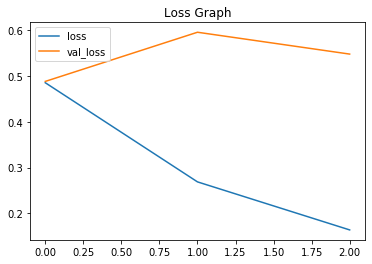

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(train_history.history["loss"])
plt.plot(train_history.history["val_loss"])
plt.title("Loss Graph")
plt.legend(['loss', 'val_loss'], loc="upper left")

## 5-模型準確率分析

In [13]:
y_test = test_df['sentiment']
e = model.evaluate(x_test_pad, y_test)
print("衡量係數:", e)
print("正確率:", e[1] * 100, "%")

25000/25000 [==============================] - 2s 62us/step
衡量係數: [0.4429616660785675, 0.82328]
正確率: 82.328 %


In [14]:
from keras.models import Model
embedding_layer_model = Model(inputs=model.input,
outputs=model.layers[0].output)
# 把第一筆文章拿來給你看轉換後的維度
em = embedding_layer_model.predict(x_test_pad[0:1])
em

array([[[-0.10354807,  0.06290944,  0.03362415, ..., -0.06237663,
         -0.02939766,  0.01960575],
        [-0.01342821,  0.00724204,  0.00764056, ..., -0.05418717,
          0.02463837,  0.03317647],
        [-0.017739  ,  0.01639404, -0.0162296 , ...,  0.01936937,
         -0.04223343, -0.0424851 ],
        ...,
        [ 0.02763872, -0.00576016,  0.03781375, ..., -0.07641748,
         -0.00502364, -0.01940539],
        [-0.0620291 , -0.00898862, -0.06679096, ..., -0.04504115,
          0.08763292, -0.03512549],
        [ 0.03698017,  0.04923515, -0.11988942, ...,  0.04849885,
         -0.034025  ,  0.05118869]]], dtype=float32)

# 6-保存模型

In [0]:
model.save('Embedding.h5')